<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413 Group Assignment 2

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.4 MB/s eta 0:00:00


In [4]:
from dmba import classificationSummary

Colab environment detected.


In [5]:
%matplotlib inline

# Data Preprocessing

In [6]:
# Reading in the file
xlsx = 'https://github.com/amss330/Data/raw/039493dec4c56ec4008de0a8146908ddab4293c4/ebayAuctions.xlsx'
Ebay = pd.read_excel(xlsx, 'eBay auctions')
Ebay.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [7]:
Ebay

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [10]:
# Creating Dummy Variables for the Categorical Variables
Ebay = pd.get_dummies(Ebay, columns = ["Category", 'Currency', 'endDay', 'Duration'])
Ebay.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
Ebay.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
Ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1972 non-null   int64  
 1   ClosePrice                     1972 non-null   float64
 2   OpenPrice                      1972 non-null   float64
 3   Competitive?                   1972 non-null   int64  
 4   Category_Antique/Art/Craft     1972 non-null   uint8  
 5   Category_Automotive            1972 non-null   uint8  
 6   Category_Books                 1972 non-null   uint8  
 7   Category_Business/Industrial   1972 non-null   uint8  
 8   Category_Clothing/Accessories  1972 non-null   uint8  
 9   Category_Coins/Stamps          1972 non-null   uint8  
 10  Category_Collectibles          1972 non-null   uint8  
 11  Category_Computer              1972 non-null   uint8  
 12  Category_Electronics           1972 non-null   u

# Fitting A Classification Tree

In [13]:
# Splitting the data into training and test datasets
X = Ebay.drop(columns = ['Competitive?'])
y = Ebay['Competitive?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [14]:
# Fitting a classification tree using all predictors
fullClassTree = DecisionTreeClassifier(min_samples_split= 50, random_state = 1)

# Train the tree using X_train, y_train
fullClassTree.fit(X_train, y_train)

# Predicting using the X_test
y_predicted = fullClassTree.predict(X_test)

# Checking the accuracy
fullClassTree.score(X_test, y_test)

0.8238276299112801

In [15]:
# Checking the accuracy on the test set
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8238)

       Prediction
Actual   0   1
     0 294  59
     1  80 356


In [18]:
# Writing Down the results in term of rules
text_representation = tree.export_text(fullClassTree)
print(text_representation)

|--- feature_2 <= 3.62
|   |--- feature_1 <= 3.64
|   |   |--- feature_2 <= 0.94
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.94
|   |   |   |--- feature_2 <= 2.45
|   |   |   |   |--- feature_1 <= 2.24
|   |   |   |   |   |--- feature_1 <= 1.24
|   |   |   |   |   |   |--- feature_32 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 5245.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  5245.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_32 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  1.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  2.24
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  2.45
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_0 <= 21.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  21.00
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   | 

In [19]:
with open('fullClassTree.log', 'w') as fout:
    fout.write(text_representation)

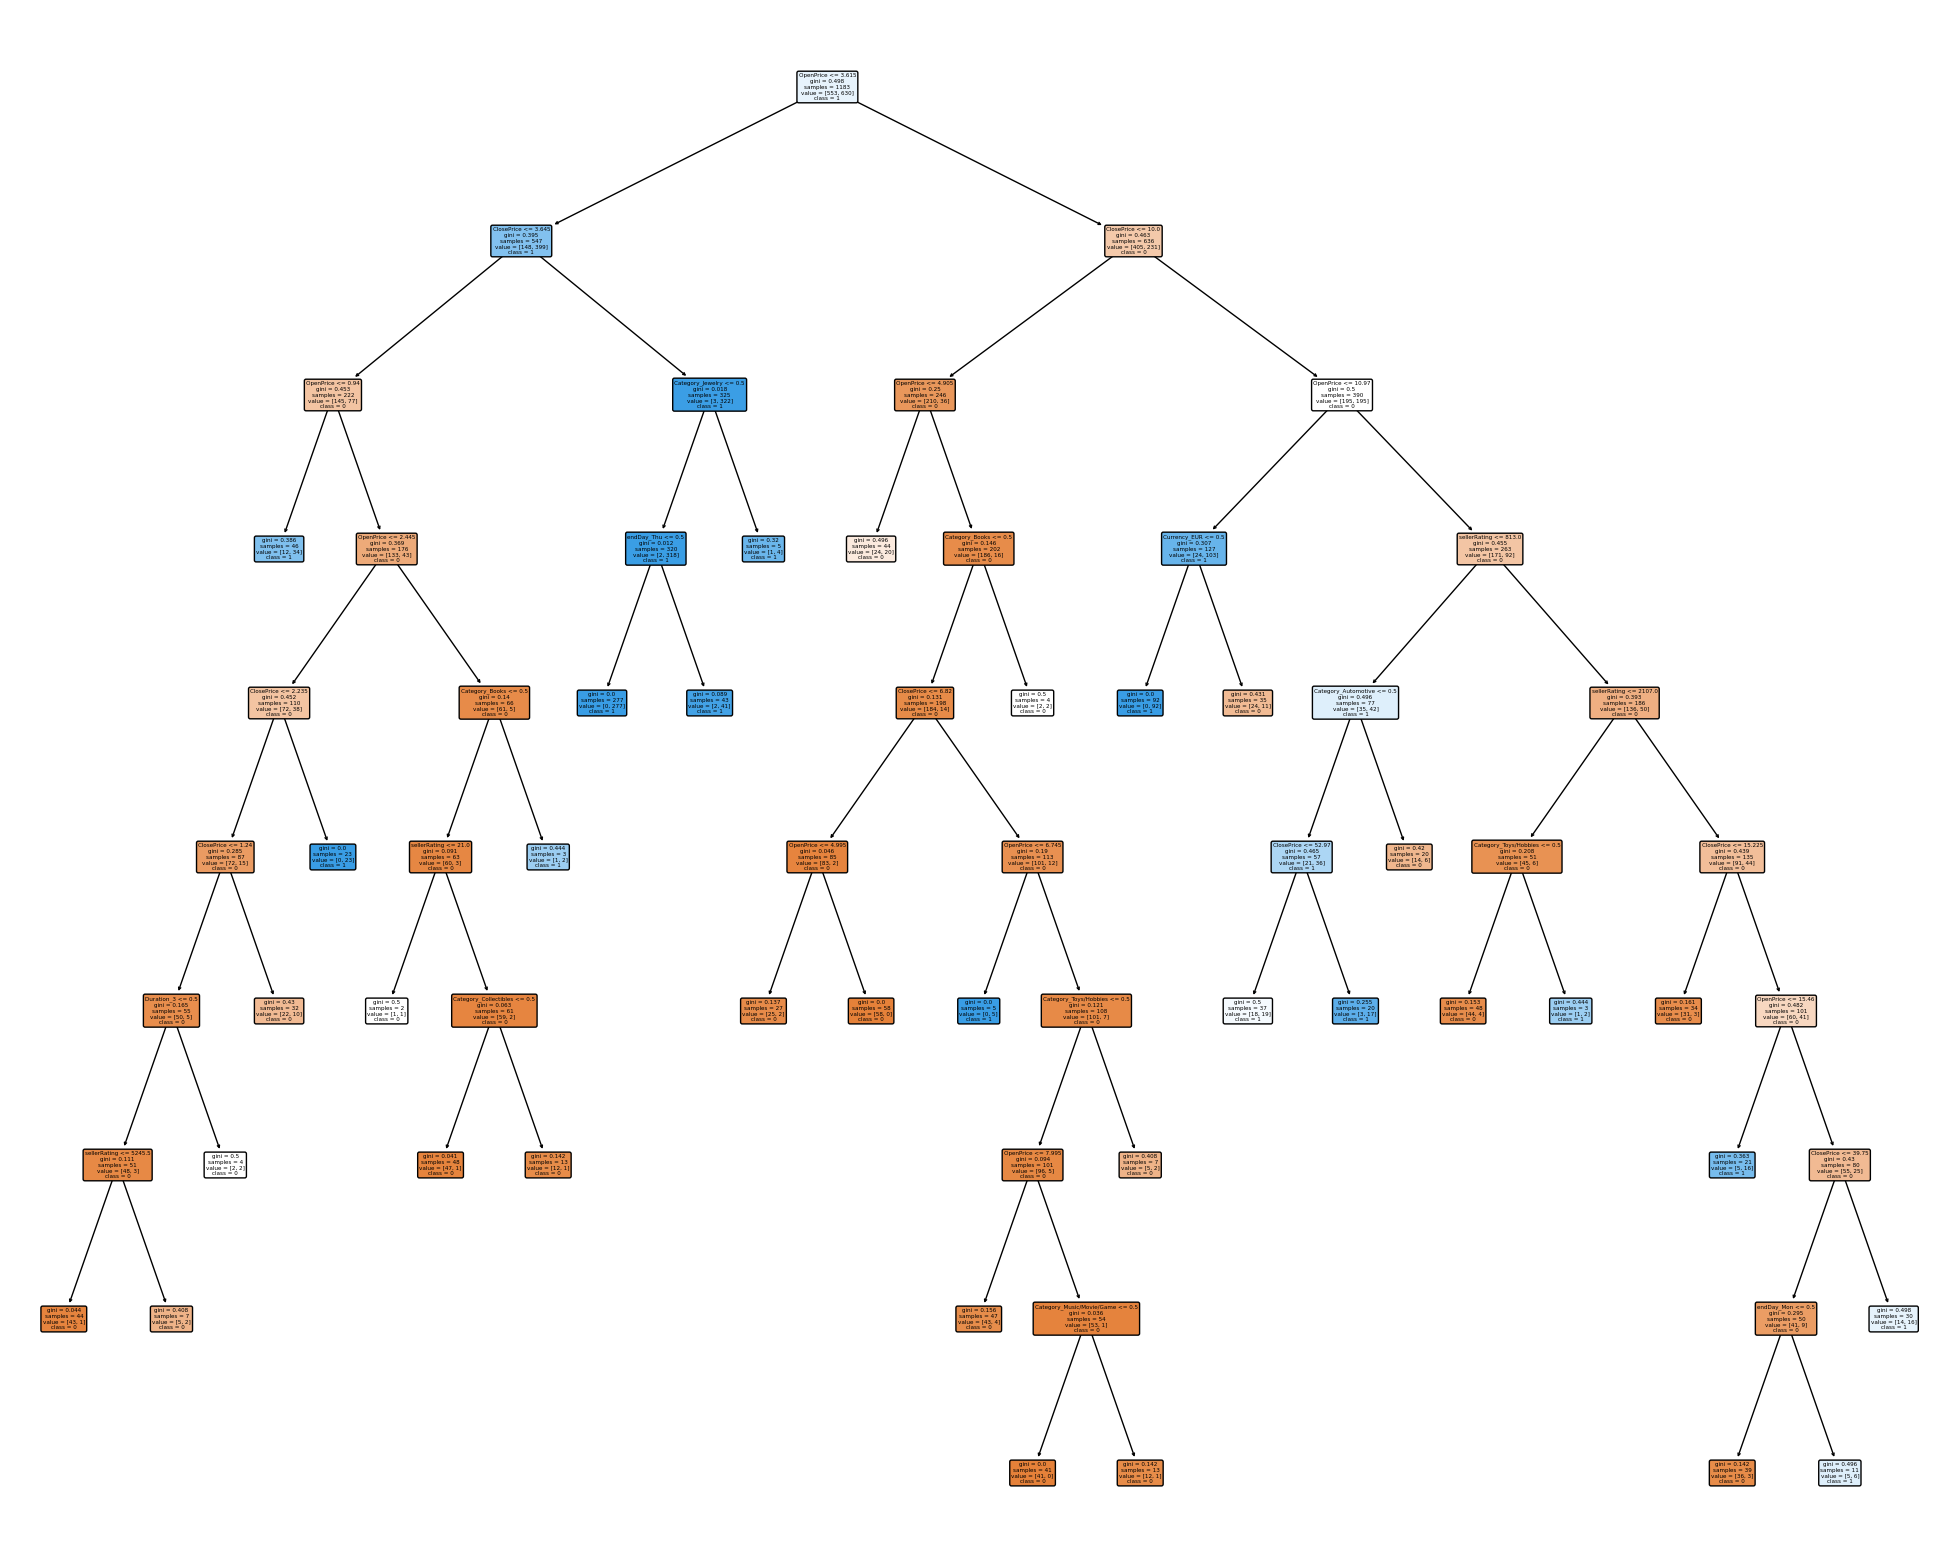

In [20]:
# Generating a tree diagram from the Full Class Tree
feature_names = list(X.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(fullClassTree, feature_names = feature_names, class_names = class_names,
              rounded = True, filled = True)
fig.savefig('fullClassTree.png')

export_graphviz(fullClassTree, out_file = 'fullClassTree.dot', feature_names = feature_names,
                class_names = class_names, rounded = True, filled = True)

In [21]:
# Feature Importance

# Extracting the importances by sklearn
Importances = fullClassTree.feature_importances_

# Creating a dictionary with the feature importance
feature_importance = {}
for i, feature in enumerate(feature_names):
    feature_importance[feature] = round(Importances[i], 3)

print(f"Feature importance: {feature_importance}")

Feature importance: {'sellerRating': 0.033, 'ClosePrice': 0.463, 'OpenPrice': 0.407, 'Category_Antique/Art/Craft': 0.0, 'Category_Automotive': 0.008, 'Category_Books': 0.009, 'Category_Business/Industrial': 0.0, 'Category_Clothing/Accessories': 0.0, 'Category_Coins/Stamps': 0.0, 'Category_Collectibles': 0.0, 'Category_Computer': 0.0, 'Category_Electronics': 0.0, 'Category_EverythingElse': 0.0, 'Category_Health/Beauty': 0.0, 'Category_Home/Garden': 0.0, 'Category_Jewelry': 0.001, 'Category_Music/Movie/Game': 0.0, 'Category_Photography': 0.0, 'Category_Pottery/Glass': 0.0, 'Category_SportingGoods': 0.0, 'Category_Toys/Hobbies': 0.007, 'Currency_EUR': 0.059, 'Currency_GBP': 0.0, 'Currency_US': 0.0, 'endDay_Fri': 0.0, 'endDay_Mon': 0.009, 'endDay_Sat': 0.0, 'endDay_Sun': 0.0, 'endDay_Thu': 0.0, 'endDay_Tue': 0.0, 'endDay_Wed': 0.0, 'Duration_1': 0.0, 'Duration_3': 0.004, 'Duration_5': 0.0, 'Duration_7': 0.0, 'Duration_10': 0.0}


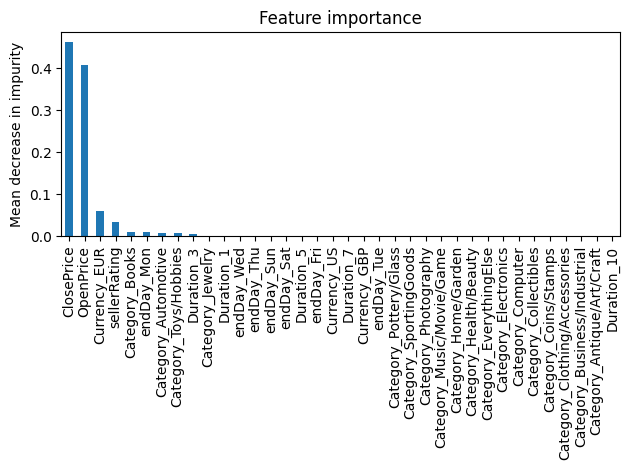

In [22]:
forest_importances = pd.Series(feature_importance)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Fitting a Classification Tree with only Relevant Predictors

In [23]:
# Constructing a smaller tree
X_small = Ebay[['OpenPrice', 'ClosePrice']]
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size = 0.4, random_state = 1)

In [24]:
# Fitting a classification tree using only relevant predictors
smallClassTree = DecisionTreeClassifier(min_samples_leaf= 50, random_state = 1)

# Train the tree using X_train, y_train
smallClassTree.fit(X_train, y_train)

# Predicting using the X_test
y_predicted = smallClassTree.predict(X_test)

# Checking the accuracy
smallClassTree.score(X_test, y_test)

0.8048162230671736

In [25]:
# Checking the accuracy on the test set
classificationSummary(y_test, smallClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8048)

       Prediction
Actual   0   1
     0 313  40
     1 114 322


In [ ]:
# Text Representation of the Smaller Tree
text_representation_small = tree.export_text(smallClassTree)
print(text_representation_small)

with open('smallClassTree.log', 'w') as fout:
    fout.write(text_representation_small)

|--- feature_0 <= 3.62
|   |--- feature_1 <= 3.64
|   |   |--- feature_0 <= 1.03
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.03
|   |   |   |--- feature_0 <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  2.45
|   |   |   |   |--- class: 0
|   |--- feature_1 >  3.64
|   |   |--- feature_0 <= 2.46
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.46
|   |   |   |--- class: 1
|--- feature_0 >  3.62
|   |--- feature_1 <= 10.00
|   |   |--- feature_0 <= 4.97
|   |   |   |--- class: 0
|   |   |--- feature_0 >  4.97
|   |   |   |--- feature_1 <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  6.82
|   |   |   |   |--- feature_0 <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.99
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  10.00
|   |   |--- feature_0 <= 10.97
|   |   |   |--- feature_0 <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  9.89
|   |   |   |   |--- class: 1
|   |   |--- fea

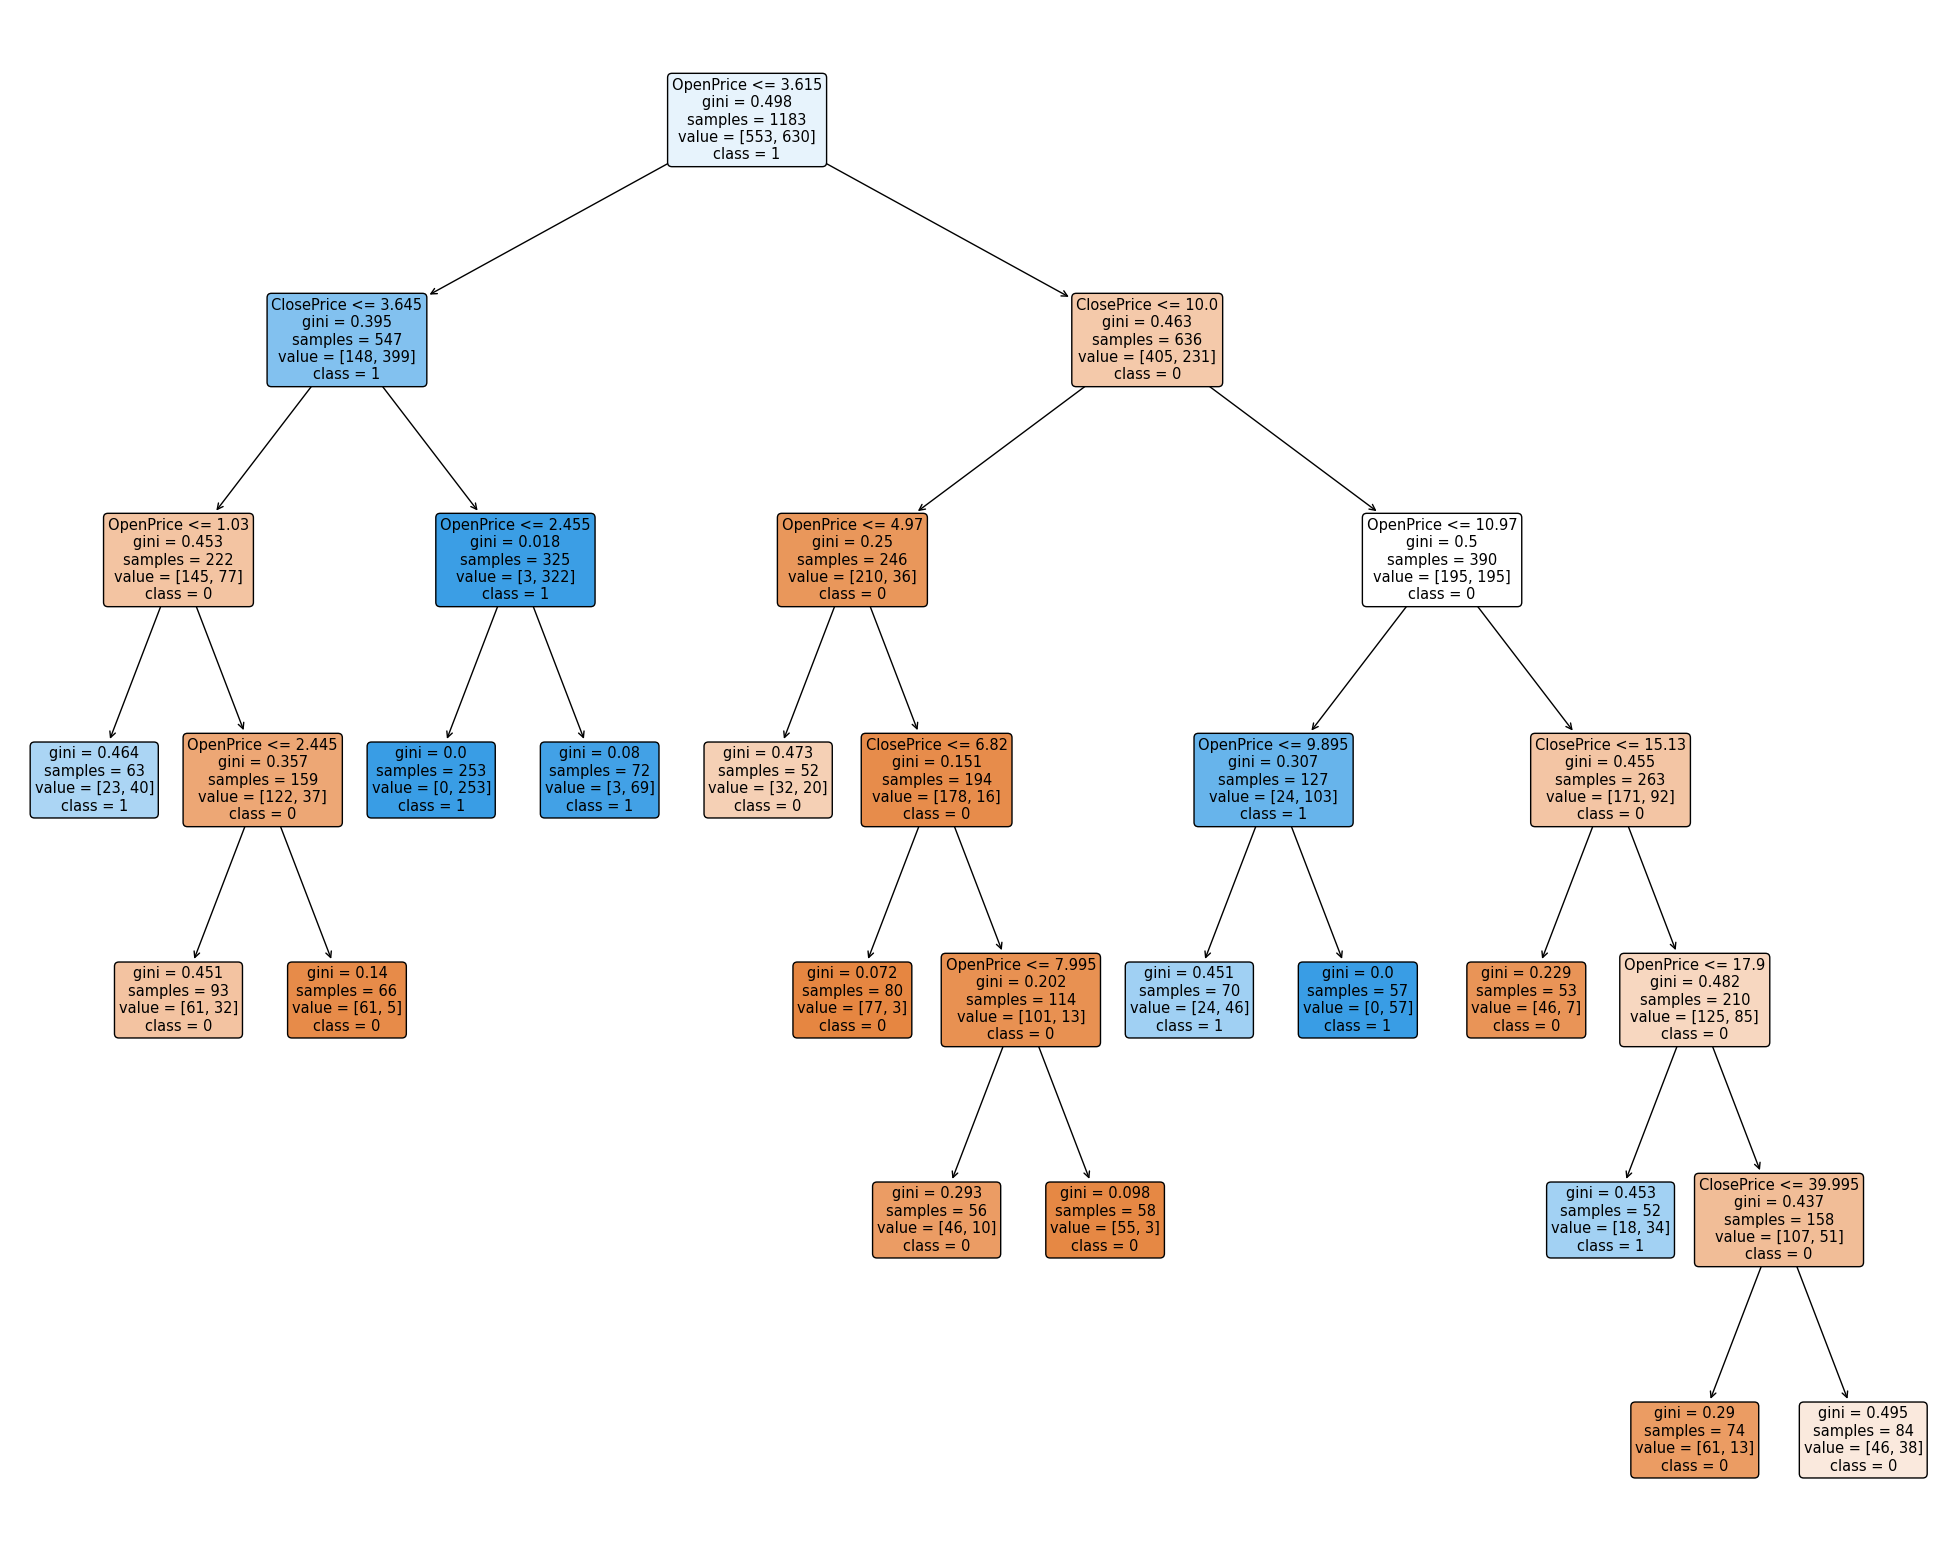

In [ ]:
# Generating a tree diagram from the Smaller Class Tree
feature_names = list(X_small.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(smallClassTree, feature_names = feature_names, class_names = class_names,
              rounded = True, filled = True)
fig.savefig('smallClassTree.png')

export_graphviz(smallClassTree, out_file = 'smallClassTree.dot', feature_names = feature_names,
                class_names = class_names, rounded = True, filled = True)

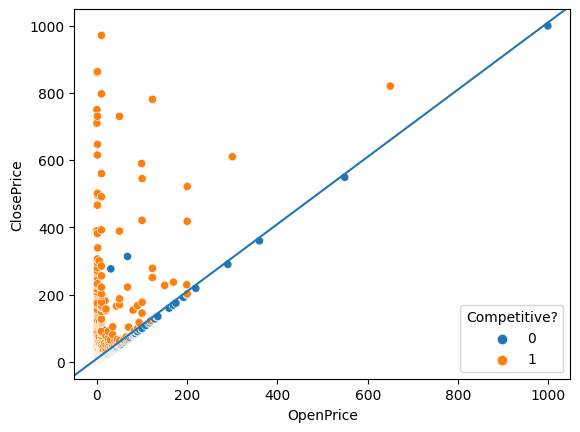

In [ ]:
# Scatter Plot of the Two Quantitative Predictors
sns.scatterplot(x = "OpenPrice", y = "ClosePrice", hue = "Competitive?", data = Ebay)
plt.axline((190, 200), (390, 400))

# Eric : Recommendation Strategy Tree

In [ ]:
# Constructing a smaller tree
X_strategy = Ebay[['OpenPrice', 'Duration', 'Currency_EUR', 'Currency_US', 'Currency_GBP', 'endDay_Mon','endDay_Tue','endDay_Wed','endDay_Thu','endDay_Fri','endDay_Sat','endDay_Sun']]
y = Ebay['Competitive?']
X_train, X_test, y_train, y_test = train_test_split(X_strategy, y, test_size = 0.4, random_state = 1)

In [ ]:
# Fitting a classification tree using only relevant predictors
StrategyClassTree = DecisionTreeClassifier(min_samples_leaf= 50, random_state = 1)

# Train the tree using X_train, y_train
StrategyClassTree.fit(X_train, y_train)

# Predicting using the X_test
y_predicted = StrategyClassTree.predict(X_test)

# Checking the accuracy on the test set
classificationSummary(y_test, StrategyClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.6946)

       Prediction
Actual   0   1
     0 275  78
     1 163 273


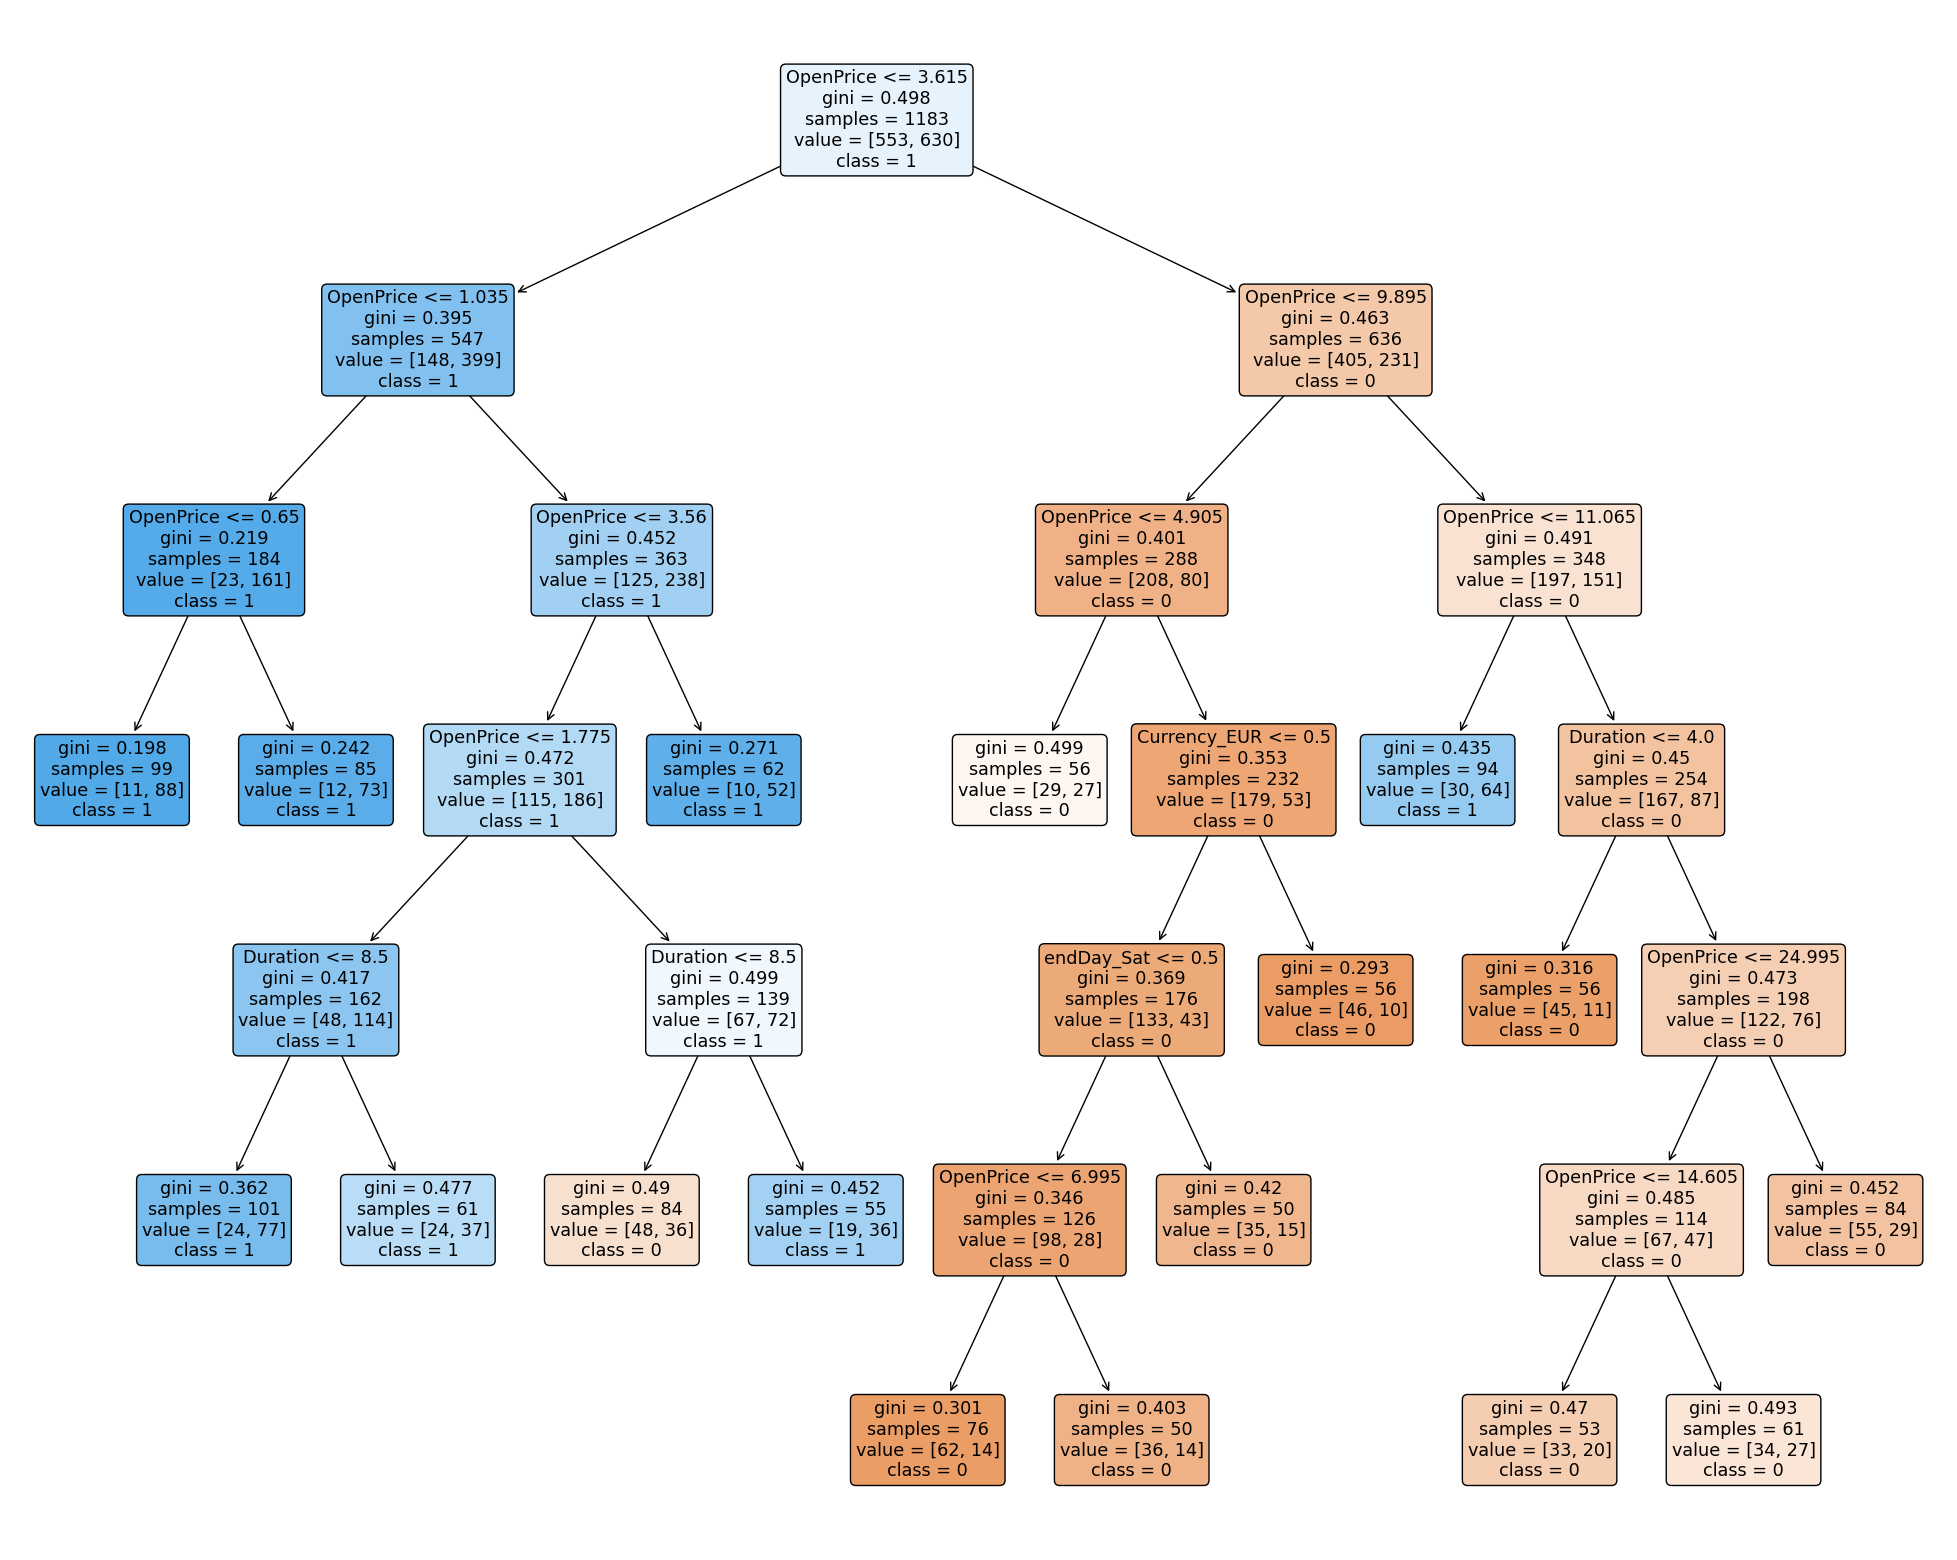

In [ ]:
# Generating a tree diagram from the DT
feature_names = list(X_strategy.columns)
list_int = list(y.unique())
class_names = list(map(str, list_int))

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(StrategyClassTree, feature_names = feature_names, class_names = class_names,
              rounded = True, filled = True)
fig.savefig('StrategyClassTree.png')

export_graphviz(StrategyClassTree, out_file = 'StrategyClassTree.dot', feature_names = feature_names,
                class_names = class_names, rounded = True, filled = True)